In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#Loading Data
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
x=iris_data.iloc[:,[0,1,2,3]].values

In [4]:
#Finding optimum number of clusters for KMeans
from sklearn.cluster import KMeans
wss=[]
K=range(1,12)
for k in K:
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x)
    wss.append(kmeans.inertia_)

In [5]:
centers=pd.DataFrame({'Clusters':K, 'WSS':wss })
centers

,Clusters,WSS
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182
5,6,39.039987
6,7,34.434106
7,8,30.400007
8,9,28.136880
9,10,25.970930


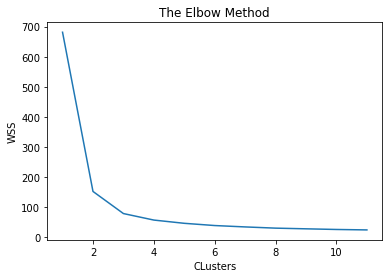

In [6]:
#Plotting results in a line graph
plt.plot(K,wss)
plt.title("The Elbow Method")
plt.xlabel("CLusters")
plt.ylabel("WSS")
plt.show()

In [7]:
#Applying KMeans to our data
kmeans=KMeans(n_clusters=3, init='k-means++')
y_kmeans=kmeans.fit_predict(x)

In [8]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

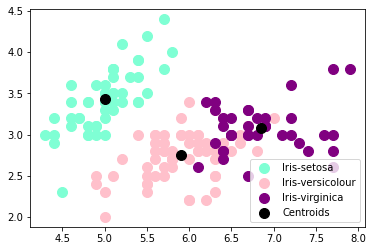

In [9]:
#Visualising the Clusters of first 2 columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'aquamarine', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()